You will be given two datasets.  Both of these are classic datasets.  The first one is an auto MPG dataset where I would like to predict the mpg based on the other features.  

The second dataset is a telelcom dataset where you have to predict whether the customer is going to churn (leave the telecom company) or not

Linear: https://archive.ics.uci.edu/ml/datasets/Auto+MPG (and attached csv file)

Logistic: This is attached

Required: You will be turning in two files LastName_FirstName_Midterm_Logistic/Linear

Please use Pandas and any Data Viz Libraries at your disposal. I would like to see a full data science project to an extent.  Obviously we are on a short timeframe here but graphs/charts showing the distribution of the data and how the features interact with each other.  I would expect a fully mature model.  Part of the grading will be based on your methodology and your results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_org = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Explore Data

In [3]:
data_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
data_org.shape

(7043, 21)

In [5]:
data_org.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data_org.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Data preprocess

#### Unique Data

In [7]:
# Find unique data
for i in data_org.columns:
    if data_org[i].unique().size == len(data_org):
        print('Column {} has unique data.'.format(i))

Column customerID has unique data.


#### Explore categorical data

In [8]:
# Go over object data
cate_list = []
for i in data_org.drop(['customerID','tenure','MonthlyCharges'],axis = 1).columns:
    print(i,data_org[i].unique())
    cate_list.append(i)

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn ['No' 'Yes']


In [9]:
# Looks like there might be some missing data in column 'TotalCharges' so that it cannot transfer to float data automaticaliy
non_float_index = []
for i in data_org.index:
    try:
        float(data_org['TotalCharges'][i])
    except:
        print('index: {}, value: {}'.format(i,data_org['TotalCharges'][i]))
        non_float_index.append(i)

index: 488, value:  
index: 753, value:  
index: 936, value:  
index: 1082, value:  
index: 1340, value:  
index: 3331, value:  
index: 3826, value:  
index: 4380, value:  
index: 5218, value:  
index: 6670, value:  
index: 6754, value:  


Looks like it is just a space. Is that means the customer didn't spend any money, or just missing data?

In [10]:
data_org.iloc[non_float_index]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Looks like those data are missing. I will deal with it later.

#### Convert categorical data

In [11]:
cate_list.remove('TotalCharges')
data = pd.get_dummies(data_org, drop_first = True, columns = cate_list)
data.columns

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

#### Missing categorical data

In [12]:
# Change the dtype to float, and set ' ' as np.nan
data['TotalCharges'] = data['TotalCharges'].replace(' ',0).astype('float').replace(0,np.nan)

#### Plot

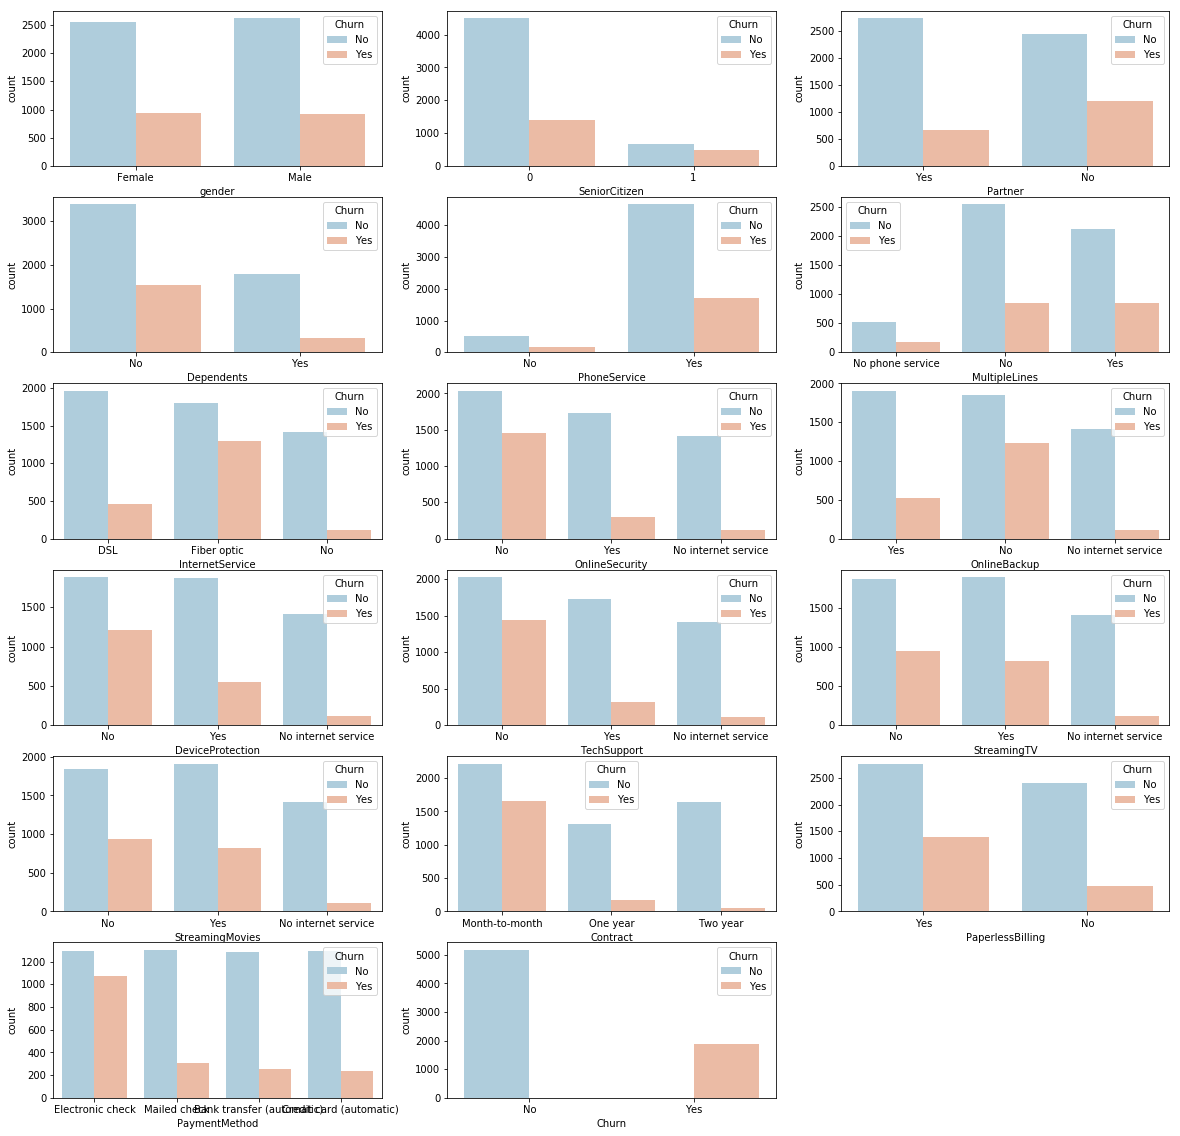

In [13]:
fig = plt.figure(figsize = (20,20))
for a,b in enumerate(cate_list):
    ax = fig.add_subplot(6,3,1+a)
    sns.countplot(x=b,data=data_org,hue = 'Churn',palette='RdBu_r')

#### Continuous data

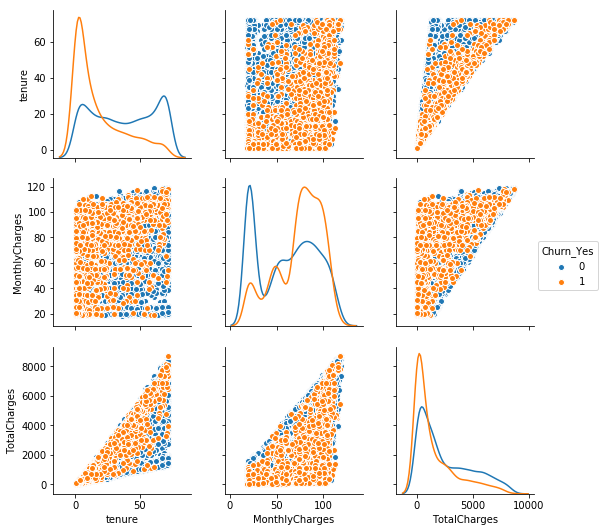

In [14]:
sns.pairplot(data.dropna(),vars = ['tenure','MonthlyCharges','TotalCharges'],diag_kind = 'kde',hue = 'Churn_Yes' )

#### Data cleaning

In [15]:
# Fill na with mode
import statistics
data.fillna(statistics.mode(data.dropna()['TotalCharges']),inplace = True)

### Training model

#### Split data into training and test set

In [16]:
from sklearn.model_selection import train_test_split

X = data.drop(['customerID','Churn_Yes'],axis=1)
y = data['Churn_Yes']

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,stratify = data['Churn_Yes'], test_size=0.20,random_state=101)

#### Data scale

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#### K-Neighbors Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier

#use grid search to find best parameter
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':[1,2,3,4,5]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 10)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [19]:
knn = KNeighborsClassifier(n_neighbors = 4).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(knn.score(X_test, y_test))) 

Training set score: 0.84
Test set score: 0.77


#### Logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression

#use grid search to find best parameter
param_grid = {'C':[0.01,1,100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv = 10)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
logmodel = LogisticRegression(C = 100).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(logmodel.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(logmodel.score(X_test, y_test))) 

Training set score: 0.81
Test set score: 0.79


#### Decision trees

In [22]:
# Already using the best parameters
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 5,random_state = 0).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(tree.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(tree.score(X_test, y_test))) 

Training set score: 0.81
Test set score: 0.77


#### Random forests

In [23]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 8, random_state = 2).fit(X_train_org,y_train)
print('Training set score: {:.2f}'.format(forest.score(X_train_org, y_train)))
print('Test set score: {:.2f}'.format(forest.score(X_test_org, y_test))) 

Training set score: 0.98
Test set score: 0.77


#### SVM

In [24]:
# Already using the best parameters
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf',C = 1, gamma = 0.01).fit(X_train,y_train)
print('Training set score: {:.2f}'.format(svm.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(svm.score(X_test, y_test)))

Training set score: 0.81
Test set score: 0.78


#### GradientBoostingClassifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train_org, y_train)
print('Training set score: {:.2f}'.format(gbrt.score(X_train_org, y_train)))
print('Test set score: {:.2f}'.format(gbrt.score(X_test_org, y_test)))

Training set score: 0.83
Test set score: 0.80


The best model is logistic regression and gradient boosted regression trees.

### Evaluation

In [26]:
from sklearn.metrics import classification_report

In [27]:
# logistic regression
print(classification_report(y_test,logmodel.predict(X_test)))

             precision    recall  f1-score   support

          0       0.84      0.88      0.86      1035
          1       0.61      0.53      0.57       374

avg / total       0.78      0.79      0.78      1409



In [28]:
print(classification_report(y_test,gbrt.predict(X_test_org)))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1035
          1       0.64      0.52      0.58       374

avg / total       0.79      0.80      0.79      1409

